## Applying cuts on root files

In [2]:
import uproot
import pandas as pd

Open file

In [3]:
# Requires voms proxy 
f = uproot.open("root://cmsxrootd.fnal.gov///store/mc/RunIIFall17NanoAODv6/DYToMuMu_M-800To1400_NNPDF30NLO_TuneCUETP8M1_13TeV-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano25Oct2019_102X_mc2017_realistic_v7-v1/270000/63314D13-DEFE-B44D-949B-8E61BD82A5A2.root")

List file content

In [4]:
f.allkeys()

[b'tag;1',
 b'Events;1',
 b'LuminosityBlocks;1',
 b'Runs;1',
 b'MetaData;1',
 b'ParameterSets;1']

Define tree

In [5]:
t = f["Events"]

Create a dataframe from branch info within the tree. It may take a while

In [16]:
# This may take forever depending on the size of the tree (t)
df = t.arrays(["nJet",
               "nElectron","Electron_charge","Electron_pt",
               "nMuon","Muon_charge","Muon_pt"], outputtype=pd.DataFrame)

In [17]:
df.head()

,nJet,nElectron,Electron_charge,Electron_pt,nMuon,Muon_charge,Muon_pt
entry,,,,,,,
0,6,0,[],[],1,[1],[197.0023]
1,8,1,[-1],[8.547187],2,"[1, -1]","[255.84554, 194.80261]"
2,2,0,[],[],1,[-1],[121.58706]
3,5,0,[],[],2,"[1, -1]","[448.831, 384.9482]"
4,5,0,[],[],2,"[1, -1]","[273.683, 199.05408]"


Selecting events containing more than 1 electrons(positrons)

In [18]:
df[df["nElectron"]>1].head()

,nJet,nElectron,Electron_charge,Electron_pt,nMuon,Muon_charge,Muon_pt
entry,,,,,,,
40,10,2,"[-1, 1]","[8.173346, 7.5817924]",2,"[1, -1]","[470.22583, 467.3939]"
62,5,2,"[1, 1]","[10.450915, 7.7716017]",2,"[1, -1]","[395.7405, 333.15588]"
72,5,2,"[1, -1]","[11.284711, 5.79293]",2,"[-1, 1]","[393.90927, 385.1408]"
74,4,2,"[-1, 1]","[107.81476, 8.242768]",2,"[1, -1]","[398.50064, 195.02525]"
99,6,2,"[-1, 1]","[6.780763, 6.1730275]",2,"[1, -1]","[536.0136, 468.1409]"


Defining a filter so we can filter electrons out:

In [19]:
df[
    df["nElectron"]>1
]["Electron_charge"].apply(lambda x: x == -1).head()

entry
40     [True, False]
62    [False, False]
72     [False, True]
74     [True, False]
99     [True, False]
Name: Electron_charge, dtype: object

Defining a filter so all events are selected if they have *at least* one electron

In [20]:
df[
    df["nElectron"]>1
]["Electron_charge"].apply(lambda x: any(x == -1)).head()

entry
40     True
62    False
72     True
74     True
99     True
Name: Electron_charge, dtype: bool

Combining filters

In [21]:
df[
    (df["nElectron"]>1)
    &
    (df["Electron_charge"].apply(lambda x: any(x == -1)))
].head()

,nJet,nElectron,Electron_charge,Electron_pt,nMuon,Muon_charge,Muon_pt
entry,,,,,,,
40,10,2,"[-1, 1]","[8.173346, 7.5817924]",2,"[1, -1]","[470.22583, 467.3939]"
72,5,2,"[1, -1]","[11.284711, 5.79293]",2,"[-1, 1]","[393.90927, 385.1408]"
74,4,2,"[-1, 1]","[107.81476, 8.242768]",2,"[1, -1]","[398.50064, 195.02525]"
99,6,2,"[-1, 1]","[6.780763, 6.1730275]",2,"[1, -1]","[536.0136, 468.1409]"
146,11,2,"[-1, -1]","[8.870316, 5.37845]",3,"[1, -1, 1]","[488.42624, 431.7626, 76.831]"


Plotting

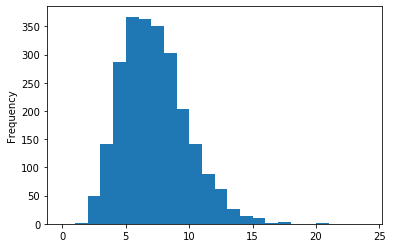

In [22]:
df[
    (df["Electron_charge"].apply(lambda x: any(x == -1)))
]["nJet"].plot(kind="hist",bins=range(0,25))

### Another filter: Containing only electrons

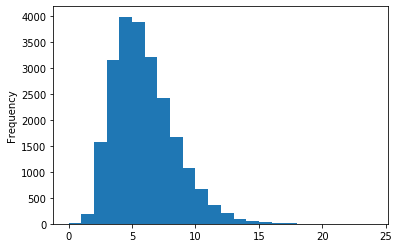

In [24]:
df[
    (df["Electron_charge"].apply(lambda x: all(x == -1)))
]["nJet"].plot(kind="hist",bins=range(0,25))

### Containing two electrons at least

In [28]:
twoElectrons = df["Electron_charge"].apply(lambda x : ((len(x)-2) > sum(x)))

In [29]:
df[twoElectrons].head()

,nJet,nElectron,Electron_charge,Electron_pt,nMuon,Muon_charge,Muon_pt
entry,,,,,,,
146,11,2,"[-1, -1]","[8.870316, 5.37845]",3,"[1, -1, 1]","[488.42624, 431.7626, 76.831]"
201,8,4,"[1, -1, -1, 1]","[26.767668, 10.201869, 9.128413, 7.7696815]",2,"[1, -1]","[569.57855, 563.3358]"
302,6,2,"[-1, -1]","[12.010416, 10.369589]",2,"[1, -1]","[595.10864, 432.8126]"
419,6,2,"[-1, -1]","[5.7961407, 5.0853767]",2,"[1, -1]","[467.05682, 441.8586]"
894,8,2,"[-1, -1]","[12.432208, 11.08706]",2,"[1, -1]","[573.36206, 386.0919]"


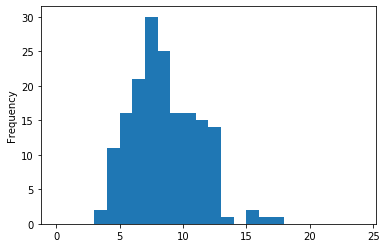

In [30]:
df[twoElectrons]["nJet"].plot(kind="hist",bins=range(0,25))

### Range based cut

In [31]:
def anyCut(x, minn , maxx):
    
    # True if any element in x lies within (minn,maxx)
    
    for i in x:
        if i > minn and i < maxx:
            return True
    return False

def allCut(x, minn, maxx):
    
    # True if all elements in x lies within (minn,maxx)
    
    for i in x:
        if i < minn or i > maxx:
            return False    
    return True

In [33]:
minElectronPt = 10.0
maxElectronPt = 200.0

minMuonPt = 0
maxMuonPt = 200

tmp = df[
    ( (df["nElectron"]>1) & (df["nMuon"]>1))
    &
    ( (df["Electron_charge"].apply(lambda x: all(x == -1)))
        &
        (
            ( df["Electron_pt"].apply(lambda x: anyCut(x, minElectronPt, maxElectronPt)) )
            
            |
            
            ( df["Muon_pt"].apply(lambda x: allCut(x, minMuonPt, maxMuonPt)) )
        )
    )
]

In [34]:
tmp.head()

,nJet,nElectron,Electron_charge,Electron_pt,nMuon,Muon_charge,Muon_pt
entry,,,,,,,
302,6,2,"[-1, -1]","[12.010416, 10.369589]",2,"[1, -1]","[595.10864, 432.8126]"
894,8,2,"[-1, -1]","[12.432208, 11.08706]",2,"[1, -1]","[573.36206, 386.0919]"
1196,9,2,"[-1, -1]","[61.089104, 8.276776]",2,"[-1, 1]","[411.26385, 350.21576]"
1387,7,2,"[-1, -1]","[10.701129, 7.5116625]",2,"[1, -1]","[424.54996, 389.8932]"
1693,6,2,"[-1, -1]","[10.73604, 5.6225777]",2,"[-1, 1]","[355.2139, 328.4946]"


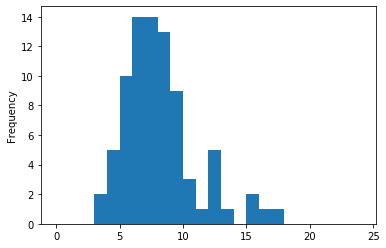

In [37]:
tmp["nJet"].plot(kind="hist", bins=range(0,25))

## Awkward-array example

*numpy* in a shell

In [ ]:
import numpy as np

x = np.array([[45,50,55,22],[45,20,55,22]])

display(x)

display((x>45).sum(axis = 1))
display(((x>45).sum(axis = 1))>=2)

Applying filters sequentially

In [100]:
f = uproot.open("root://cmsxrootd.fnal.gov///store/mc/RunIISummer16NanoAODv6/DYJetsToTauTau_ForcedMuEleDecay_M-50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_ext1/NANOAODSIM/PUMoriond17_Nano25Oct2019_102X_mcRun2_asymptotic_v7_ext1-v1/270000/F0B896C1-0757-CC42-A5EF-F4E480D85C7D.root")
t = f["Events"]

In [101]:
tauBranches = ["nTau","Tau_pt","Tau_eta","Tau_charge","Tau_mass"]
awk = t.lazyarrays(tauBranches + ["nJet"])

In [102]:
awk

<Table [<Row 0> <Row 1> <Row 2> ... <Row 72855> <Row 72856> <Row 72857>] at 0x7f36ff51cba8>

Take only events with 2 or more 'taus'

In [103]:
tauCut = awk[awk["nTau"]>=2]
tauCut

<Table [<Row 34> <Row 42> <Row 52> ... <Row 72819> <Row 72828> <Row 72851>] at 0x7f36ff52ebe0>

Only events with at least to 'taus' with a pt more than 40GeV

In [104]:
tauCut = tauCut[(tauCut["Tau_pt"]>40).sum() >= 2]
tauCut

<Table [<Row 122> <Row 214> <Row 547> ... <Row 71236> <Row 72384> <Row 72390>] at 0x7f36ff538ba8>

Only events with at least one tau and one antitau

In [105]:
tauCut = tauCut[
    (tauCut["Tau_charge"].max() == 1) & (tauCut["Tau_charge"].min() == -1)
]

In [106]:
display(tauCut)
display(tauCut["Tau_charge"])
display(tauCut["nJet"])

<Table [<Row 214> <Row 547> <Row 614> ... <Row 71019> <Row 71236> <Row 72384>] at 0x7f36ff53fef0>

<ChunkedArray [[-1 -1 1] [1 -1] [1 -1] [-1 1 -1] [-1 1 -1] [1 -1] [-1 1] ...] at 0x7f36ffdb17b8>

<ChunkedArray [4 14 6 11 3 4 6 ...] at 0x7f36ff53fc50>

### Range based cuts

In [107]:
minn = 100
maxx = 150

awk[
    (awk["nTau"]>=2) &
    (awk["Tau_pt"].min() >= minn) & 
    (awk["Tau_pt"].max() <= maxx)
]

<Table [<Row 10660> <Row 41748>] at 0x7f36ff4e56d8>